In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [3]:
X = data.data
y = data.target

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

y = pd.get_dummies(y1).values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

# Building the network

In [6]:
import keras
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint


def generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate):
    model = Sequential()
    model.add(Dense(units=hidden_nodes,
                    kernel_initializer=keras.initializers.RandomUniform(-1, 1),
                    activation='sigmoid',
                    input_dim=input_nodes))
    model.add(Dense(units=output_nodes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=learning_rate, momentum=0.9, nesterov=True),
                  metrics=['accuracy']                  
                 )
    
    return model

Using TensorFlow backend.


In [7]:
import os
import shutil

dir = '/home/ricardo/mestrado/models/'
if os.path.exists(dir):
    shutil.rmtree(dir)
os.mkdir(dir)

epochs = 1000
learning_rate = 0.0001
hidden_nodes = 3000
input_nodes = X_train.shape[1]
output_nodes = y_train.shape[1]

model = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)

save_model_checkpoint = ModelCheckpoint(dir + 'weights.{epoch:04d}-{val_loss:.5f}-{val_acc:.5f}.hdf5',
                                            verbose=0, 
                                            save_best_only=False,                                           
                                            save_weights_only=False,
                                            mode='auto',                                           
                                            period=1)

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs,
                    callbacks=[save_model_checkpoint]
                   )

Train on 455 samples, validate on 114 samples
Epoch 1/1000
455/455 [==============================] - 0s 620us/step - loss: 0.7190 - acc: 0.6374 - val_loss: 0.5748 - val_acc: 0.7193
Epoch 2/1000
455/455 [==============================] - 0s 181us/step - loss: 0.5551 - acc: 0.6615 - val_loss: 0.5011 - val_acc: 0.7632
Epoch 3/1000
455/455 [==============================] - 0s 218us/step - loss: 0.4924 - acc: 0.8440 - val_loss: 0.4466 - val_acc: 0.8772
Epoch 4/1000
455/455 [==============================] - 0s 130us/step - loss: 0.4450 - acc: 0.8725 - val_loss: 0.4050 - val_acc: 0.9035
Epoch 5/1000
455/455 [==============================] - 0s 115us/step - loss: 0.4074 - acc: 0.8967 - val_loss: 0.3739 - val_acc: 0.9123
Epoch 6/1000
455/455 [==============================] - 0s 109us/step - loss: 0.3808 - acc: 0.8989 - val_loss: 0.3508 - val_acc: 0.9123
Epoch 7/1000
455/455 [==============================] - 0s 137us/step - loss: 0.3594 - acc: 0.8967 - val_loss: 0.3346 - val_acc: 0.9123
Ep

455/455 [==============================] - 0s 116us/step - loss: 0.1950 - acc: 0.9275 - val_loss: 0.2196 - val_acc: 0.9123
Epoch 61/1000
455/455 [==============================] - 0s 122us/step - loss: 0.1963 - acc: 0.9297 - val_loss: 0.2191 - val_acc: 0.9123
Epoch 62/1000
455/455 [==============================] - 0s 110us/step - loss: 0.1962 - acc: 0.9275 - val_loss: 0.2125 - val_acc: 0.9211
Epoch 63/1000
455/455 [==============================] - 0s 113us/step - loss: 0.1928 - acc: 0.9275 - val_loss: 0.2172 - val_acc: 0.9123
Epoch 64/1000
455/455 [==============================] - 0s 115us/step - loss: 0.1950 - acc: 0.9275 - val_loss: 0.2149 - val_acc: 0.9211
Epoch 65/1000
455/455 [==============================] - 0s 117us/step - loss: 0.1910 - acc: 0.9297 - val_loss: 0.2124 - val_acc: 0.9211
Epoch 66/1000
455/455 [==============================] - 0s 110us/step - loss: 0.1915 - acc: 0.9275 - val_loss: 0.2132 - val_acc: 0.9211
Epoch 67/1000
455/455 [==============================] 

Epoch 120/1000
455/455 [==============================] - 0s 121us/step - loss: 0.1714 - acc: 0.9319 - val_loss: 0.2005 - val_acc: 0.9211
Epoch 121/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1725 - acc: 0.9297 - val_loss: 0.2015 - val_acc: 0.9123
Epoch 122/1000
455/455 [==============================] - 0s 80us/step - loss: 0.1721 - acc: 0.9297 - val_loss: 0.2030 - val_acc: 0.9123
Epoch 123/1000
455/455 [==============================] - 0s 81us/step - loss: 0.1703 - acc: 0.9319 - val_loss: 0.2027 - val_acc: 0.9123
Epoch 124/1000
455/455 [==============================] - 0s 83us/step - loss: 0.1705 - acc: 0.9319 - val_loss: 0.2027 - val_acc: 0.9123
Epoch 125/1000
455/455 [==============================] - 0s 78us/step - loss: 0.1701 - acc: 0.9297 - val_loss: 0.1995 - val_acc: 0.9298
Epoch 126/1000
455/455 [==============================] - 0s 163us/step - loss: 0.1729 - acc: 0.9319 - val_loss: 0.1995 - val_acc: 0.9298
Epoch 127/1000
455/455 [===============

455/455 [==============================] - 0s 86us/step - loss: 0.1609 - acc: 0.9341 - val_loss: 0.1985 - val_acc: 0.9123
Epoch 180/1000
455/455 [==============================] - 0s 83us/step - loss: 0.1629 - acc: 0.9297 - val_loss: 0.1957 - val_acc: 0.9123
Epoch 181/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1609 - acc: 0.9319 - val_loss: 0.1943 - val_acc: 0.9211
Epoch 182/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1629 - acc: 0.9319 - val_loss: 0.1935 - val_acc: 0.9211
Epoch 183/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1613 - acc: 0.9319 - val_loss: 0.1969 - val_acc: 0.9123
Epoch 184/1000
455/455 [==============================] - 0s 106us/step - loss: 0.1606 - acc: 0.9363 - val_loss: 0.1926 - val_acc: 0.9211
Epoch 185/1000
455/455 [==============================] - 0s 77us/step - loss: 0.1614 - acc: 0.9363 - val_loss: 0.1955 - val_acc: 0.9123
Epoch 186/1000
455/455 [==============================]

Epoch 239/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1546 - acc: 0.9319 - val_loss: 0.1939 - val_acc: 0.9123
Epoch 240/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1549 - acc: 0.9319 - val_loss: 0.1915 - val_acc: 0.9298
Epoch 241/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1540 - acc: 0.9341 - val_loss: 0.1948 - val_acc: 0.9211
Epoch 242/1000
455/455 [==============================] - 0s 86us/step - loss: 0.1560 - acc: 0.9297 - val_loss: 0.1944 - val_acc: 0.9123
Epoch 243/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1556 - acc: 0.9341 - val_loss: 0.1935 - val_acc: 0.9298
Epoch 244/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1554 - acc: 0.9319 - val_loss: 0.1961 - val_acc: 0.9035
Epoch 245/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1531 - acc: 0.9319 - val_loss: 0.1923 - val_acc: 0.9298
Epoch 246/1000
455/455 [=================

455/455 [==============================] - 0s 104us/step - loss: 0.1489 - acc: 0.9363 - val_loss: 0.1911 - val_acc: 0.9123
Epoch 299/1000
455/455 [==============================] - 0s 108us/step - loss: 0.1502 - acc: 0.9363 - val_loss: 0.1897 - val_acc: 0.9123
Epoch 300/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1480 - acc: 0.9363 - val_loss: 0.1934 - val_acc: 0.9123
Epoch 301/1000
455/455 [==============================] - 0s 110us/step - loss: 0.1492 - acc: 0.9341 - val_loss: 0.1902 - val_acc: 0.9211
Epoch 302/1000
455/455 [==============================] - 0s 102us/step - loss: 0.1487 - acc: 0.9341 - val_loss: 0.1905 - val_acc: 0.9211
Epoch 303/1000
455/455 [==============================] - 0s 154us/step - loss: 0.1491 - acc: 0.9363 - val_loss: 0.1880 - val_acc: 0.9123
Epoch 304/1000
455/455 [==============================] - 0s 186us/step - loss: 0.1482 - acc: 0.9363 - val_loss: 0.1926 - val_acc: 0.9035
Epoch 305/1000
455/455 [==========================

455/455 [==============================] - 0s 119us/step - loss: 0.1448 - acc: 0.9385 - val_loss: 0.1856 - val_acc: 0.9211
Epoch 358/1000
455/455 [==============================] - 0s 128us/step - loss: 0.1465 - acc: 0.9385 - val_loss: 0.1860 - val_acc: 0.9211
Epoch 359/1000
455/455 [==============================] - 0s 101us/step - loss: 0.1453 - acc: 0.9341 - val_loss: 0.1878 - val_acc: 0.9211
Epoch 360/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1448 - acc: 0.9341 - val_loss: 0.1852 - val_acc: 0.9123
Epoch 361/1000
455/455 [==============================] - 0s 201us/step - loss: 0.1454 - acc: 0.9407 - val_loss: 0.1850 - val_acc: 0.9211
Epoch 362/1000
455/455 [==============================] - 0s 162us/step - loss: 0.1459 - acc: 0.9363 - val_loss: 0.1864 - val_acc: 0.9211
Epoch 363/1000
455/455 [==============================] - 0s 129us/step - loss: 0.1435 - acc: 0.9363 - val_loss: 0.1855 - val_acc: 0.9211
Epoch 364/1000
455/455 [==========================

455/455 [==============================] - 0s 117us/step - loss: 0.1400 - acc: 0.9385 - val_loss: 0.1846 - val_acc: 0.9211
Epoch 417/1000
455/455 [==============================] - 0s 98us/step - loss: 0.1416 - acc: 0.9341 - val_loss: 0.1864 - val_acc: 0.9211
Epoch 418/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1393 - acc: 0.9363 - val_loss: 0.1832 - val_acc: 0.9123
Epoch 419/1000
455/455 [==============================] - 0s 103us/step - loss: 0.1419 - acc: 0.9385 - val_loss: 0.1850 - val_acc: 0.9211
Epoch 420/1000
455/455 [==============================] - 0s 107us/step - loss: 0.1395 - acc: 0.9363 - val_loss: 0.1868 - val_acc: 0.9211
Epoch 421/1000
455/455 [==============================] - 0s 106us/step - loss: 0.1398 - acc: 0.9363 - val_loss: 0.1850 - val_acc: 0.9123
Epoch 422/1000
455/455 [==============================] - 0s 110us/step - loss: 0.1398 - acc: 0.9385 - val_loss: 0.1860 - val_acc: 0.9211
Epoch 423/1000
455/455 [===========================

455/455 [==============================] - 0s 111us/step - loss: 0.1374 - acc: 0.9385 - val_loss: 0.1812 - val_acc: 0.9211
Epoch 476/1000
455/455 [==============================] - 0s 107us/step - loss: 0.1373 - acc: 0.9385 - val_loss: 0.1820 - val_acc: 0.9123
Epoch 477/1000
455/455 [==============================] - 0s 112us/step - loss: 0.1385 - acc: 0.9385 - val_loss: 0.1829 - val_acc: 0.9211
Epoch 478/1000
455/455 [==============================] - 0s 108us/step - loss: 0.1380 - acc: 0.9363 - val_loss: 0.1826 - val_acc: 0.9211
Epoch 479/1000
455/455 [==============================] - 0s 88us/step - loss: 0.1376 - acc: 0.9385 - val_loss: 0.1806 - val_acc: 0.9211
Epoch 480/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1369 - acc: 0.9385 - val_loss: 0.1847 - val_acc: 0.9211
Epoch 481/1000
455/455 [==============================] - 0s 97us/step - loss: 0.1372 - acc: 0.9341 - val_loss: 0.1831 - val_acc: 0.9123
Epoch 482/1000
455/455 [============================

455/455 [==============================] - 0s 89us/step - loss: 0.1337 - acc: 0.9341 - val_loss: 0.1838 - val_acc: 0.9123
Epoch 535/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1351 - acc: 0.9385 - val_loss: 0.1793 - val_acc: 0.9211
Epoch 536/1000
455/455 [==============================] - 0s 83us/step - loss: 0.1340 - acc: 0.9385 - val_loss: 0.1828 - val_acc: 0.9211
Epoch 537/1000
455/455 [==============================] - 0s 97us/step - loss: 0.1334 - acc: 0.9363 - val_loss: 0.1813 - val_acc: 0.9123
Epoch 538/1000
455/455 [==============================] - 0s 73us/step - loss: 0.1350 - acc: 0.9385 - val_loss: 0.1829 - val_acc: 0.9211
Epoch 539/1000
455/455 [==============================] - 0s 82us/step - loss: 0.1327 - acc: 0.9385 - val_loss: 0.1847 - val_acc: 0.9123
Epoch 540/1000
455/455 [==============================] - 0s 84us/step - loss: 0.1342 - acc: 0.9385 - val_loss: 0.1838 - val_acc: 0.9211
Epoch 541/1000
455/455 [==============================] 

Epoch 594/1000
455/455 [==============================] - 0s 109us/step - loss: 0.1325 - acc: 0.9363 - val_loss: 0.1836 - val_acc: 0.9211
Epoch 595/1000
455/455 [==============================] - 0s 71us/step - loss: 0.1316 - acc: 0.9363 - val_loss: 0.1845 - val_acc: 0.9211
Epoch 596/1000
455/455 [==============================] - 0s 100us/step - loss: 0.1315 - acc: 0.9341 - val_loss: 0.1840 - val_acc: 0.9211
Epoch 597/1000
455/455 [==============================] - 0s 73us/step - loss: 0.1312 - acc: 0.9341 - val_loss: 0.1836 - val_acc: 0.9211
Epoch 598/1000
455/455 [==============================] - 0s 84us/step - loss: 0.1312 - acc: 0.9385 - val_loss: 0.1839 - val_acc: 0.9211
Epoch 599/1000
455/455 [==============================] - 0s 97us/step - loss: 0.1310 - acc: 0.9363 - val_loss: 0.1837 - val_acc: 0.9211
Epoch 600/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1311 - acc: 0.9341 - val_loss: 0.1852 - val_acc: 0.9211
Epoch 601/1000
455/455 [===============

Epoch 654/1000
455/455 [==============================] - 0s 80us/step - loss: 0.1276 - acc: 0.9385 - val_loss: 0.1829 - val_acc: 0.9211
Epoch 655/1000
455/455 [==============================] - 0s 165us/step - loss: 0.1281 - acc: 0.9385 - val_loss: 0.1789 - val_acc: 0.9211
Epoch 656/1000
455/455 [==============================] - 0s 128us/step - loss: 0.1329 - acc: 0.9429 - val_loss: 0.1791 - val_acc: 0.9211
Epoch 657/1000
455/455 [==============================] - 0s 139us/step - loss: 0.1315 - acc: 0.9363 - val_loss: 0.1846 - val_acc: 0.9211
Epoch 658/1000
455/455 [==============================] - 0s 79us/step - loss: 0.1282 - acc: 0.9385 - val_loss: 0.1803 - val_acc: 0.9123
Epoch 659/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1285 - acc: 0.9385 - val_loss: 0.1827 - val_acc: 0.9211
Epoch 660/1000
455/455 [==============================] - 0s 86us/step - loss: 0.1285 - acc: 0.9385 - val_loss: 0.1801 - val_acc: 0.9211
Epoch 661/1000
455/455 [==============

455/455 [==============================] - 0s 85us/step - loss: 0.1245 - acc: 0.9385 - val_loss: 0.1773 - val_acc: 0.9211
Epoch 714/1000
455/455 [==============================] - 0s 86us/step - loss: 0.1267 - acc: 0.9407 - val_loss: 0.1793 - val_acc: 0.9211
Epoch 715/1000
455/455 [==============================] - 0s 95us/step - loss: 0.1248 - acc: 0.9407 - val_loss: 0.1855 - val_acc: 0.9123
Epoch 716/1000
455/455 [==============================] - 0s 86us/step - loss: 0.1268 - acc: 0.9363 - val_loss: 0.1810 - val_acc: 0.9211
Epoch 717/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1246 - acc: 0.9385 - val_loss: 0.1814 - val_acc: 0.9211
Epoch 718/1000
455/455 [==============================] - 0s 95us/step - loss: 0.1243 - acc: 0.9385 - val_loss: 0.1783 - val_acc: 0.9123
Epoch 719/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1245 - acc: 0.9407 - val_loss: 0.1778 - val_acc: 0.9211
Epoch 720/1000
455/455 [==============================] 

Epoch 773/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1248 - acc: 0.9407 - val_loss: 0.1780 - val_acc: 0.9211
Epoch 774/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1232 - acc: 0.9407 - val_loss: 0.1792 - val_acc: 0.9211
Epoch 775/1000
455/455 [==============================] - 0s 79us/step - loss: 0.1213 - acc: 0.9429 - val_loss: 0.1737 - val_acc: 0.9211
Epoch 776/1000
455/455 [==============================] - 0s 78us/step - loss: 0.1236 - acc: 0.9429 - val_loss: 0.1754 - val_acc: 0.9211
Epoch 777/1000
455/455 [==============================] - 0s 81us/step - loss: 0.1233 - acc: 0.9429 - val_loss: 0.1817 - val_acc: 0.9123
Epoch 778/1000
455/455 [==============================] - 0s 101us/step - loss: 0.1230 - acc: 0.9429 - val_loss: 0.1781 - val_acc: 0.9211
Epoch 779/1000
455/455 [==============================] - 0s 78us/step - loss: 0.1220 - acc: 0.9407 - val_loss: 0.1772 - val_acc: 0.9211
Epoch 780/1000
455/455 [================

Epoch 833/1000
455/455 [==============================] - 0s 105us/step - loss: 0.1207 - acc: 0.9407 - val_loss: 0.1800 - val_acc: 0.9211
Epoch 834/1000
455/455 [==============================] - 0s 108us/step - loss: 0.1206 - acc: 0.9473 - val_loss: 0.1822 - val_acc: 0.9211
Epoch 835/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1201 - acc: 0.9407 - val_loss: 0.1780 - val_acc: 0.9123
Epoch 836/1000
455/455 [==============================] - 0s 118us/step - loss: 0.1194 - acc: 0.9407 - val_loss: 0.1806 - val_acc: 0.9211
Epoch 837/1000
455/455 [==============================] - 0s 118us/step - loss: 0.1204 - acc: 0.9473 - val_loss: 0.1788 - val_acc: 0.9123
Epoch 838/1000
455/455 [==============================] - 0s 86us/step - loss: 0.1202 - acc: 0.9407 - val_loss: 0.1819 - val_acc: 0.9211
Epoch 839/1000
455/455 [==============================] - 0s 75us/step - loss: 0.1203 - acc: 0.9451 - val_loss: 0.1842 - val_acc: 0.9123
Epoch 840/1000
455/455 [=============

Epoch 893/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1182 - acc: 0.9407 - val_loss: 0.1779 - val_acc: 0.9211
Epoch 894/1000
455/455 [==============================] - 0s 114us/step - loss: 0.1204 - acc: 0.9429 - val_loss: 0.1792 - val_acc: 0.9211
Epoch 895/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1196 - acc: 0.9429 - val_loss: 0.1778 - val_acc: 0.9211
Epoch 896/1000
455/455 [==============================] - 0s 100us/step - loss: 0.1173 - acc: 0.9429 - val_loss: 0.1820 - val_acc: 0.9211
Epoch 897/1000
455/455 [==============================] - 0s 80us/step - loss: 0.1207 - acc: 0.9495 - val_loss: 0.1798 - val_acc: 0.9211
Epoch 898/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1180 - acc: 0.9429 - val_loss: 0.1778 - val_acc: 0.9123
Epoch 899/1000
455/455 [==============================] - 0s 82us/step - loss: 0.1180 - acc: 0.9407 - val_loss: 0.1784 - val_acc: 0.9123
Epoch 900/1000
455/455 [===============

455/455 [==============================] - 0s 152us/step - loss: 0.1163 - acc: 0.9516 - val_loss: 0.1786 - val_acc: 0.9211
Epoch 953/1000
455/455 [==============================] - 0s 124us/step - loss: 0.1161 - acc: 0.9516 - val_loss: 0.1773 - val_acc: 0.9211
Epoch 954/1000
455/455 [==============================] - 0s 108us/step - loss: 0.1150 - acc: 0.9516 - val_loss: 0.1754 - val_acc: 0.9123
Epoch 955/1000
455/455 [==============================] - 0s 100us/step - loss: 0.1157 - acc: 0.9495 - val_loss: 0.1752 - val_acc: 0.9123
Epoch 956/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1160 - acc: 0.9451 - val_loss: 0.1750 - val_acc: 0.9211
Epoch 957/1000
455/455 [==============================] - 0s 84us/step - loss: 0.1165 - acc: 0.9473 - val_loss: 0.1760 - val_acc: 0.9123
Epoch 958/1000
455/455 [==============================] - 0s 86us/step - loss: 0.1174 - acc: 0.9516 - val_loss: 0.1760 - val_acc: 0.9123
Epoch 959/1000
455/455 [============================

In [8]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [9]:
print('best accuracy: %.3f' % max(history.history['acc']))
print('best validation accuracy: %.3f' % max(history.history['val_acc']))

best accuracy: 0.956
best validation accuracy: 0.930


# Weight analysis

In [10]:
def output_data(layer):
    print('min :', np.min(layer))
    print('std-:', np.average(layer)-np.std(layer))
    print('avg :', np.average(layer))
    print('std+:', np.average(layer)+np.std(layer))
    print('max :', np.max(layer))
    print()
    
def bias_not_zeros(l):
    return l.shape[0] - np.sum(abs(l) < 1e-10)

def weight_input_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=1))

def weight_output_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=0))

m = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)
def process_epoch(n):
    files = sorted(os.listdir(dir))    
    filename = dir+files[n]
    m.load_weights(filename)

    first_layer_weights = m.layers[0].get_weights()[0]
    first_layer_biases = m.layers[0].get_weights()[1]
    second_layer_weights = m.layers[1].get_weights()[0]
    second_layer_biases = m.layers[1].get_weights()[1]
    
    return {
        'w1': first_layer_weights,
        'w1nzi': weight_input_not_zeros(first_layer_weights),
        'w1nzo': weight_output_not_zeros(first_layer_weights),
        'b1': first_layer_biases,
        'b1nz': bias_not_zeros(first_layer_biases),
        'w2': second_layer_weights,
        'w2nzi': weight_input_not_zeros(second_layer_weights),
        'w2nzo': weight_output_not_zeros(second_layer_weights),
        'b2': second_layer_biases,
        'b2nz': bias_not_zeros(second_layer_biases)
    }

a = process_epoch(0)

# Graphics

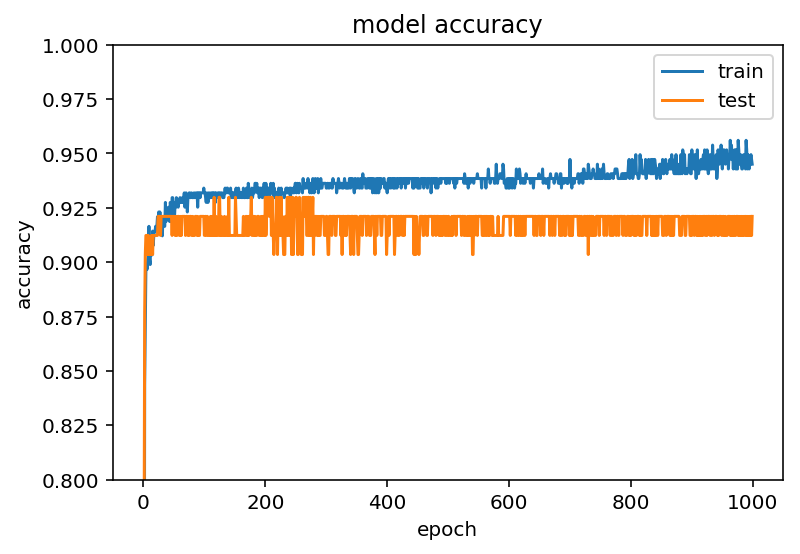

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.ylim([0.8, 1.0])
plt.show()

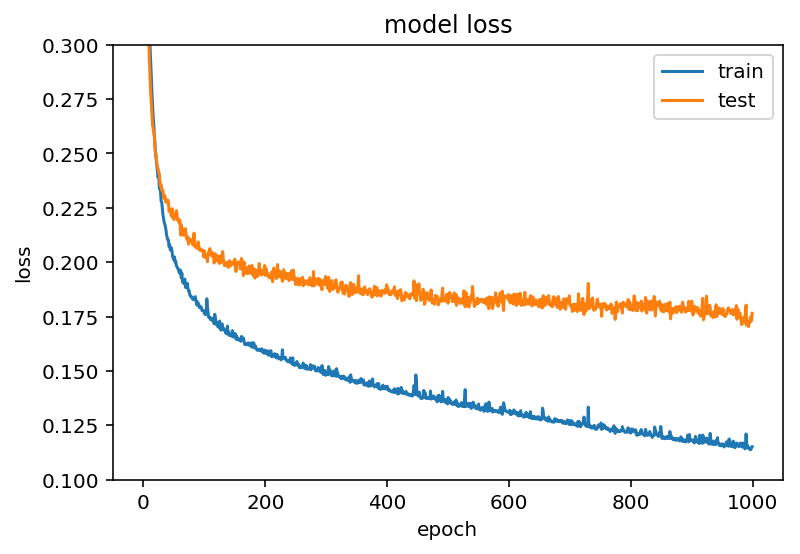

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.ylim([.1, .3])
plt.show()

In [16]:
first_layer_weight_avg = []
first_layer_bias_avg = []
first_layer_bias_not_zero = []
w1nzi = []
w1nzo = []

second_layer_weight_avg = []
second_layer_bias_avg = []
second_layer_bias_not_zero = []
w2nzi = []
w2nzo = []

for i in range(epochs):
    r = process_epoch(i)
    first_layer_weight_avg.append(np.average(np.abs(r['w1'])))
    first_layer_bias_avg.append(np.average(np.abs(r['b1'])))
    first_layer_bias_not_zero.append(r['b1nz'])
    w1nzi.append(r['w1nzi'])
    w1nzo.append(r['w1nzo'])
    
    second_layer_weight_avg.append(np.average(np.abs(r['w2'])))
    second_layer_bias_avg.append(np.average(np.abs(r['b2'])))
    second_layer_bias_not_zero.append(r['b2nz'])
    w2nzi.append(r['w2nzi'])
    w2nzo.append(r['w2nzo'])

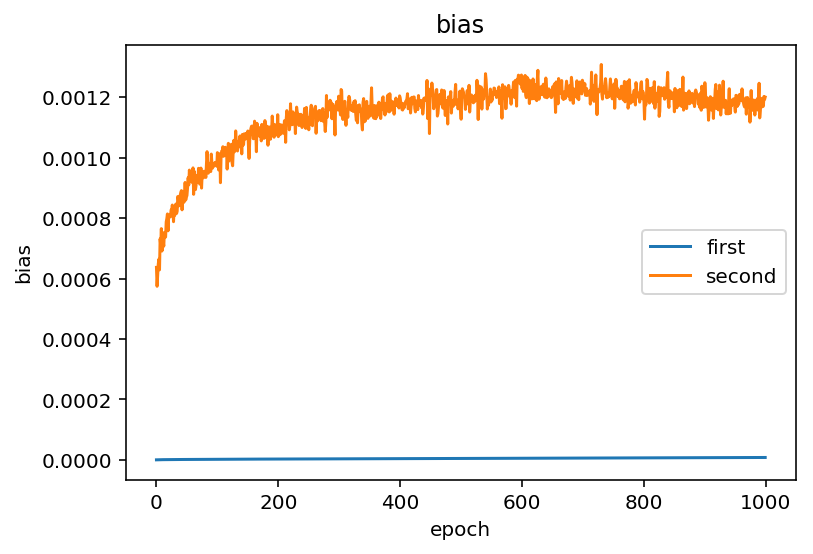

In [17]:
plt.plot(first_layer_bias_avg)
plt.plot(second_layer_bias_avg)
plt.title('bias')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['first', 'second'], loc='best')
# plt.ylim([-3e-9, 6e-9])
# plt.ylim([, 6e-9])
plt.show()

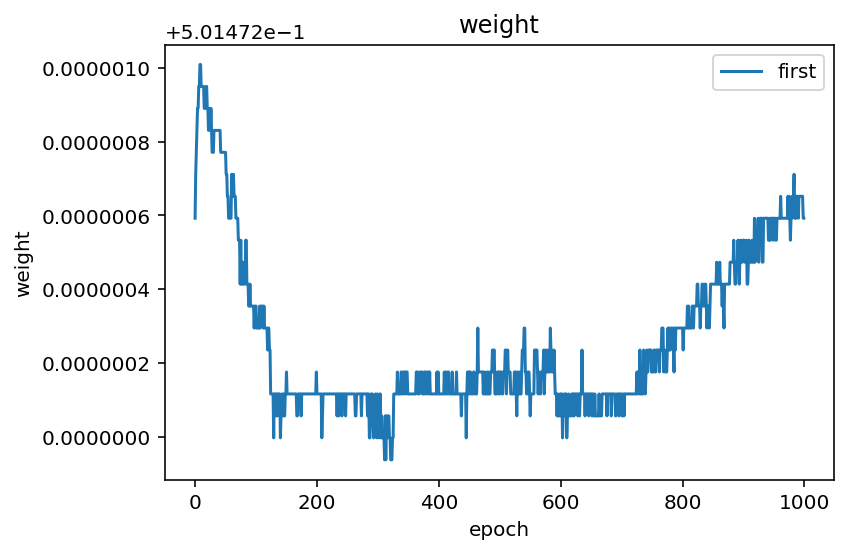

In [18]:
plt.plot(first_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['first'], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

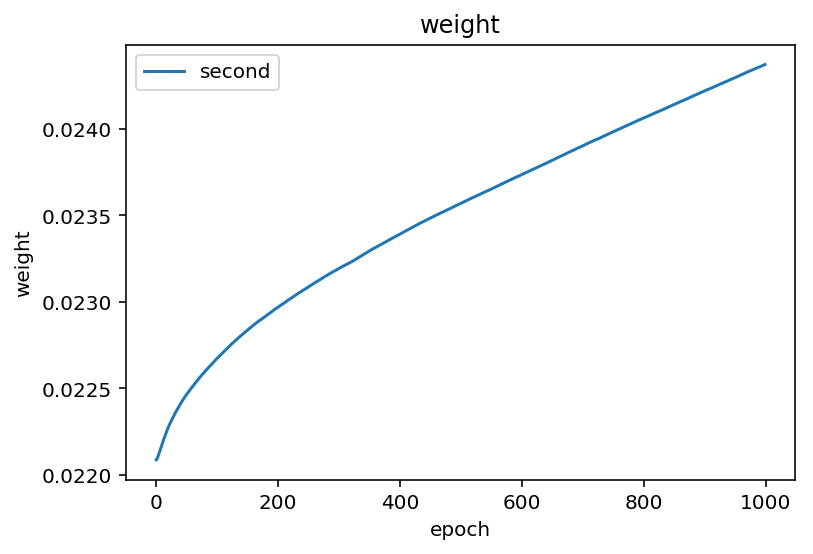

In [19]:
plt.plot(second_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['second'], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

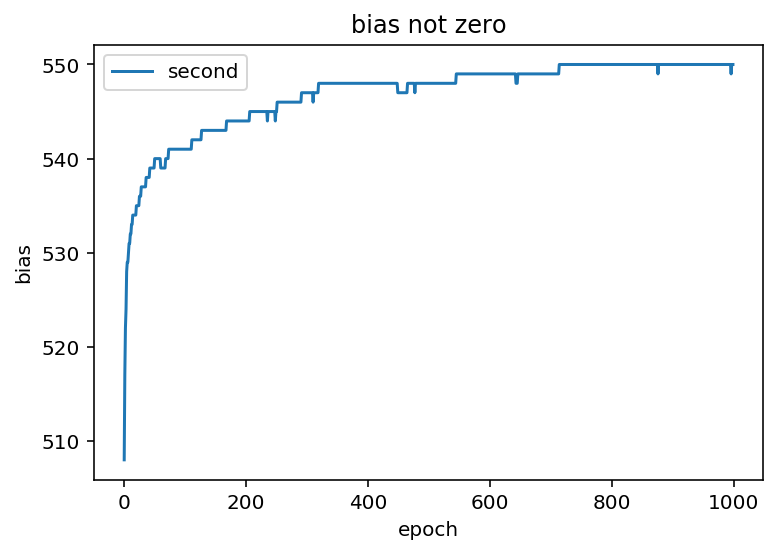

In [20]:
plt.plot(first_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

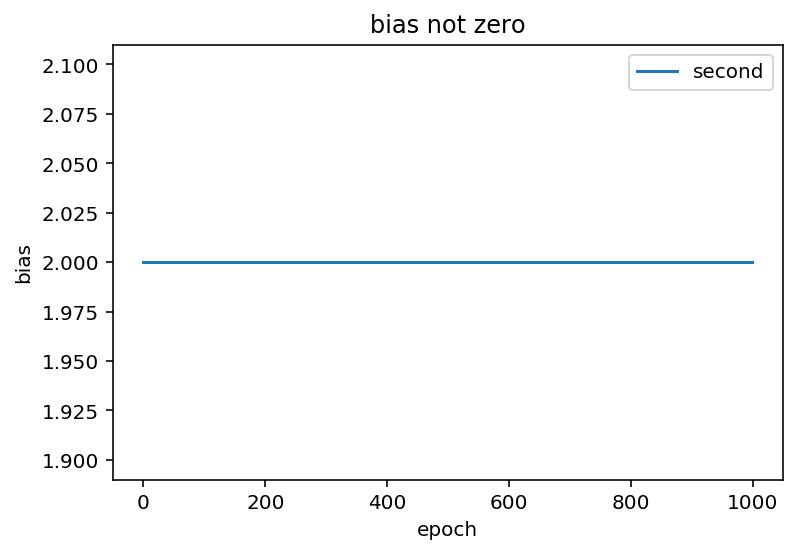

In [21]:
plt.plot(second_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

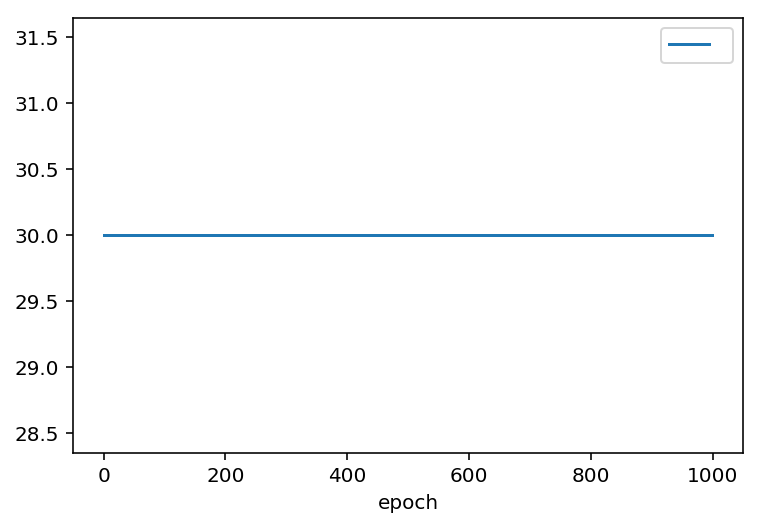

In [22]:
plt.plot(w1nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

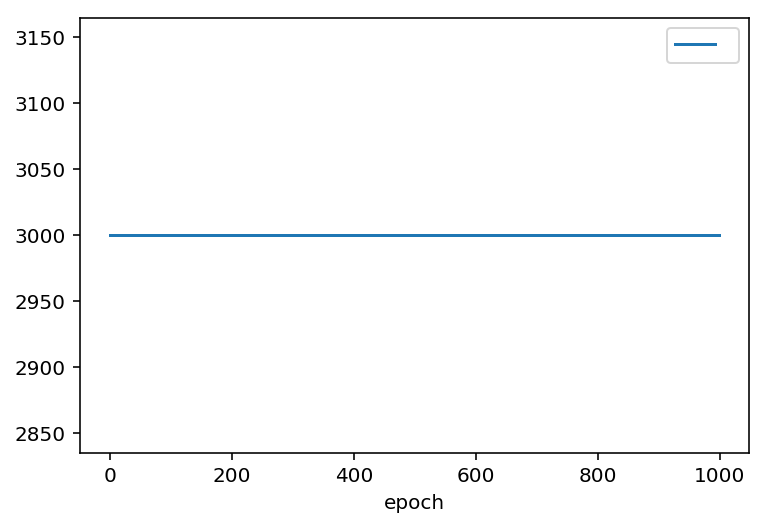

In [23]:
plt.plot(w1nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

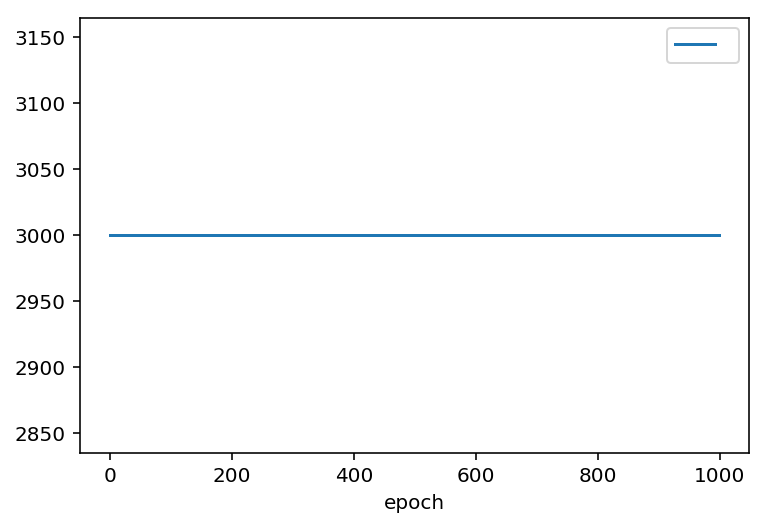

In [24]:
plt.plot(w2nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

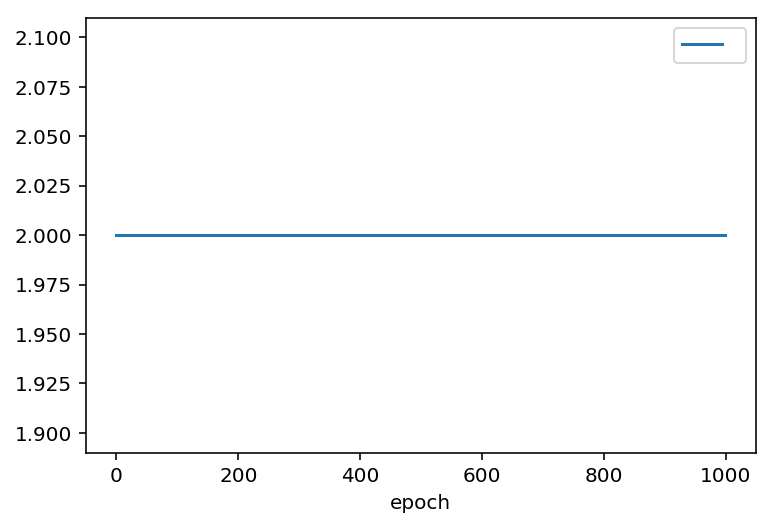

In [25]:
plt.plot(w2nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()